In [1]:
from glob import glob
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import PyBlastAfterglowMag as PBA
# from stat_analysis0 import CollateDataForRuns # moved to PBA

plt.style.use('bmh')


In [2]:
# pre-process data for simulation set
runs_dir = "/media/vsevolod/T7/work/prj_grb_afterglow/struct_fsrs_resolution/"
lc_fname = "out_lc.h5"
id_fname = "ejecta_id.h5"

lc_files = glob(runs_dir + "*/" + lc_fname)
id_files = glob(runs_dir + "*/" + id_fname)
if len(lc_files) != len(id_files):
    raise ValueError("File number mismatch")
workingdirs = [lc_file.replace(lc_fname,"") for lc_file in lc_files]
print(f"Number of working dirs: {len(workingdirs)}")


print(f"Files found: {len(lc_files)}")
print(f"Example: {lc_files[0]}")
file0 = h5py.File(lc_files[0],mode="r")
print(f"LC Keys: {file0.keys()}")
print(f"LC Attrs: {file0.attrs.keys()}")
file0.close()

file0 = h5py.File(id_files[0],mode="r")
print(f"ID Keys: {file0.keys()}")
print(f"ID Attrs: {file0.attrs.keys()}")
file0.close()

prd = PBA.run_sets.CollateDataForRuns(workingdirs=workingdirs, key_to_key_map={
    "Eiso_c"    : "Eiso_c", 
    "Gamma0c"   : "Gamma0c", 
    "theta_c"   : "theta_c", 
    "theta_w"   : "theta_w", 
    "nlayers_a" : "nlayers_a", 
    "n_ism"     : "n_ism",
    "time"      : "time",
    "flux"      : "flux"
}, verbose = True)

prd.process(mode="GRB", do_id=True, do_lc=True, do_skymap=False)

Number of working dirs: 6400
Files found: 6400
Example: /media/vsevolod/T7/work/prj_grb_afterglow/struct_fsrs_resolution/grb_Eisoc490_Gamma0c10000_thetac229_thetaw229_nlayersa22_nism0001_gauss/out_lc.h5
LC Keys: <KeysViewHDF5 ['freqs', 'shell=0 layer=0', 'shell=0 layer=1', 'shell=0 layer=10', 'shell=0 layer=11', 'shell=0 layer=12', 'shell=0 layer=13', 'shell=0 layer=14', 'shell=0 layer=15', 'shell=0 layer=16', 'shell=0 layer=17', 'shell=0 layer=18', 'shell=0 layer=19', 'shell=0 layer=2', 'shell=0 layer=20', 'shell=0 layer=21', 'shell=0 layer=3', 'shell=0 layer=4', 'shell=0 layer=5', 'shell=0 layer=6', 'shell=0 layer=7', 'shell=0 layer=8', 'shell=0 layer=9', 'times', 'total_fluxes']>
LC Attrs: <KeysViewHDF5 ['A0', 'a', 'd_l', 'eps_b', 'eps_b_rs', 'eps_e', 'eps_e_rs', 'eps_t', 'eps_t_rs', 'fnu_min_frac', 'freq1', 'freq2', 'im_max_theta', 'iout', 'ksi_n', 'ksi_n_rs', 'min_Gamma0_for_rs', 'mom0_frac_when_start_spread', 'n_ism', 'n_store_substeps', 'nfreq', 'nlayers', 'nmax', 'nphi', 'nshel

100%|██████████| 6400/6400 [30:23<00:00,  3.51it/s]

Processing 6400 complete


In [4]:
prd.get_df().to_csv(runs_dir+"collated.csv")


In [7]:
df = pd.read_csv(runs_dir+"collated.csv", index_col=0)
print(df.info(memory_usage='deep'))
for col in df:
    print(f"key={col}", df[col].unique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 960000 entries, 0 to 959999
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Eiso_c     960000 non-null  float64
 1   Gamma0c    960000 non-null  float64
 2   theta_c    960000 non-null  float64
 3   theta_w    960000 non-null  float64
 4   nlayers_a  960000 non-null  int64  
 5   n_ism      960000 non-null  float64
 6   time       960000 non-null  float64
 7   flux       960000 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 65.9 MB
None
key=Eiso_c [1.e+49 1.e+51 1.e+53 1.e+55]
key=Gamma0c [1000.  100.  300.  500.]
key=theta_c [0.4  0.05 0.6  1.   0.1 ]
key=theta_w [0.4  0.05 0.6  1.   0.1 ]
key=nlayers_a [22 32 42 52]
key=n_ism [0.001 0.01  0.1   1.   ]
key=time [1.00000000e+04 1.09647820e+04 1.20226443e+04 1.31825674e+04
 1.44543977e+04 1.58489319e+04 1.73780083e+04 1.90546072e+04
 2.08929613e+04 2.29086765e+04 2.51188643e+04 2.75422870e+04
 3.01995172

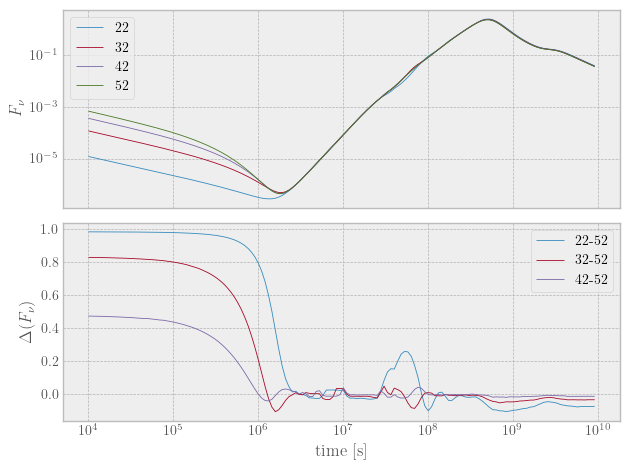

In [76]:

dff = df[((df["Eiso_c"]==1e55)
    &(df["Gamma0c"]==1000.)
    &(df["theta_c"]==0.05)
    &(df["theta_w"]==0.6)
    &(df["n_ism"]==0.001))]
    # &(df["nlayers_a"]==52))]
fig, ax = plt.subplots(ncols=1,nrows=2, sharex="all")
lls = df["nlayers_a"].unique()
for nl in lls:
    dff[(dff["nlayers_a"]==nl)].plot(ax=ax[0], x="time",y="flux",loglog=True,label=f"{nl}",lw=.6)
ax[0].set_ylabel(r"$F_{\nu}$")
ax[0].minorticks_on()
max_l = 52
for nl in lls:
    if nl != max_l:
        x = np.array(dff[(dff["nlayers_a"]==max_l)]["time"])
        y = (np.array(dff[(dff["nlayers_a"]==max_l)]["flux"]) 
            - np.array(dff[(dff["nlayers_a"]==nl)]["flux"])) / np.array(dff[(dff["nlayers_a"]==max_l)]["flux"]) 
        ax[1].semilogx(x,y,label=f"{nl}-{max_l}", lw=.6)
ax[1].legend()
ax[1].set_xlabel(r"time [s]")
ax[1].set_ylabel(r"$\Delta(F_{\nu})$")
ax[1].minorticks_on()
plt.tight_layout()
plt.show()